#  **About Dataset**
* Context

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

* Content

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: 1 for female and 2 for male.
* age: of the patient.
*  classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# **Import necessary libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn import metrics

**Read the data**

In [41]:
df=pd.read_csv("/kaggle/input/covid19-dataset/Covid Data.csv")

In [42]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [43]:
df.shape

(1048575, 21)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [45]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [46]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

* **We can see most of the data are categorical in nature**

In [47]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

* **Now we can see there are no null values, but values 97,98 and 99 are considered as null as per data info.**

**Creating table for feature with null value percentage.**

In [48]:
perc=[]
for col in list(df.columns):
   perc.append(round(len(df[(df[col]==97)| (df[col]==98) | (df[col]==98)])/len(df)*100,2))
    

In [49]:
((pd.DataFrame([df.columns,perc]).T).rename(columns={0:"Feature",1:"Percentage"})).sort_values(by="Percentage",ascending=False)

,Feature,Percentage
20,ICU,80.92
5,INTUBED,80.92
8,PREGNANT,50.28
14,OTHER_DISEASE,0.48
12,INMSUPR,0.32
9,DIABETES,0.32
18,TOBACCO,0.31
13,HIPERTENSION,0.3
17,RENAL_CHRONIC,0.29
16,OBESITY,0.29


* **In the above dataframe we can clearly see that ICU,INTUBED and PREGNANT features has more null values.**

In [50]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [51]:
useful_cols=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']

**Taking only usefull columns**

In [52]:
df=df[useful_cols]

* **Dropped ICU,INTUBED and PREGNANT columns**

**Replacing the column values with nan where values equal to 97,98 and 99.**

In [53]:
df=df.replace({
    'USMER':{97:np.nan,98:np.nan,99:np.nan},
    'MEDICAL_UNIT':{97:np.nan,98:np.nan,99:np.nan},
    'SEX':{97:np.nan,98:np.nan,99:np.nan}, 
    'PATIENT_TYPE':{97:np.nan,98:np.nan,99:np.nan}, 
    'DATE_DIED':{97:np.nan,98:np.nan,99:np.nan},
    'PNEUMONIA':{97:np.nan,98:np.nan,99:np.nan}, 
    'AGE':{97:np.nan,98:np.nan,99:np.nan}, 
    'DIABETES':{97:np.nan,98:np.nan,99:np.nan}, 
    'COPD':{97:np.nan,98:np.nan,99:np.nan}, 
    'ASTHMA':{97:np.nan,98:np.nan,99:np.nan}, 
    'INMSUPR':{97:np.nan,98:np.nan,99:np.nan},
    'HIPERTENSION':{97:np.nan,98:np.nan,99:np.nan}, 
    'OTHER_DISEASE':{97:np.nan,98:np.nan,99:np.nan}, 
    'CARDIOVASCULAR':{97:np.nan,98:np.nan,99:np.nan}, 
    'OBESITY':{97:np.nan,98:np.nan,99:np.nan},
    'RENAL_CHRONIC':{97:np.nan,98:np.nan,99:np.nan}, 
    'TOBACCO':{97:np.nan,98:np.nan,99:np.nan}, 
    'CLASIFFICATION_FINAL':{97:np.nan,98:np.nan,99:np.nan}
})

In [54]:
df.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
PNEUMONIA               16003
AGE                       345
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
dtype: int64

**Dropping rows where nan values present**

In [55]:
df=df.dropna(axis=0)

In [56]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
dtype: int64

**Replacing "9999-99-99" to 0 in DATE_DIED column(means-> Not died)**

In [57]:
df.loc[df.DATE_DIED=="9999-99-99","DATE_DIED"]=0

**Similarly, 1->died**

In [58]:
df.loc[df.DATE_DIED!=0,"DATE_DIED"]=1

In [59]:
df.rename(columns={"DATE_DIED":"DIED"},inplace=True)

In [60]:
df.DIED.value_counts(normalize=True)*100

0    92.719566
1     7.280434
Name: DIED, dtype: float64

* **93 % people are alive**
* **7.3 % died due to CORONA**

**Binning AGE feature**

In [61]:
df.AGE=pd.cut(df.AGE,bins=[1,13,21,40,100],labels=["childhood","teenage","adult","elder"])

In [62]:
cols=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA',
       'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL']

**Listing categorical feature**

In [63]:
categ_cols=[col for col in cols if df[col].nunique()<15]

In [64]:
categ_cols

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'PNEUMONIA',
 'AGE',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL']

# **Data Visualization**

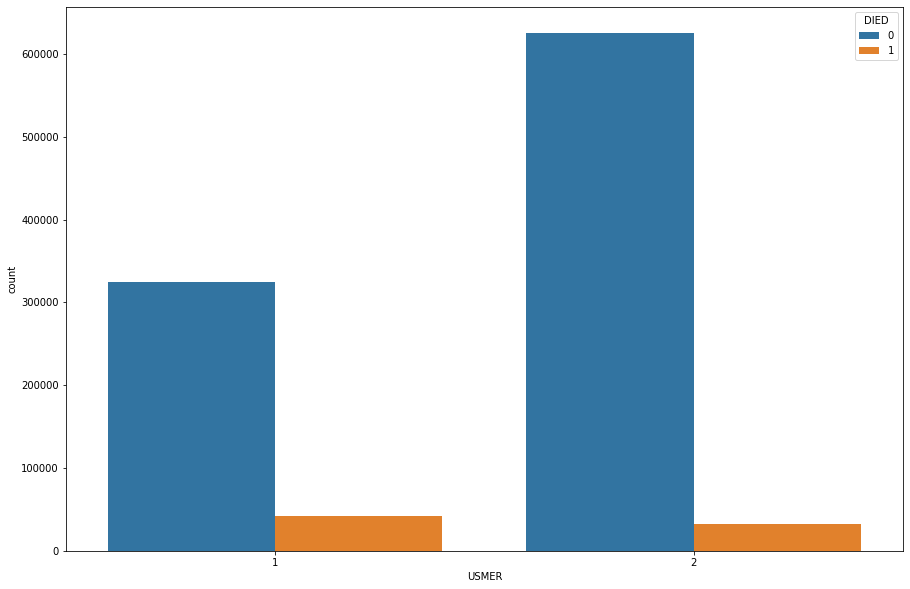

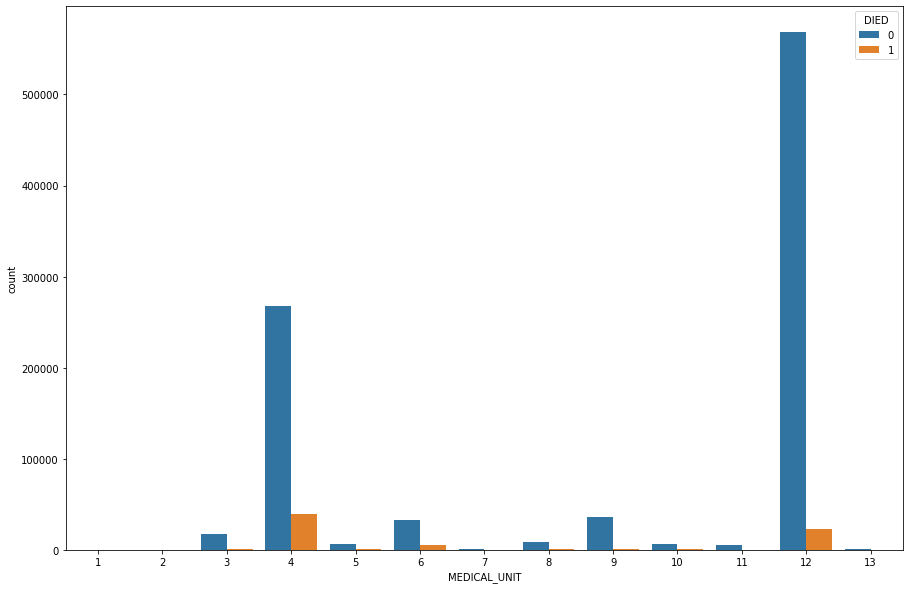

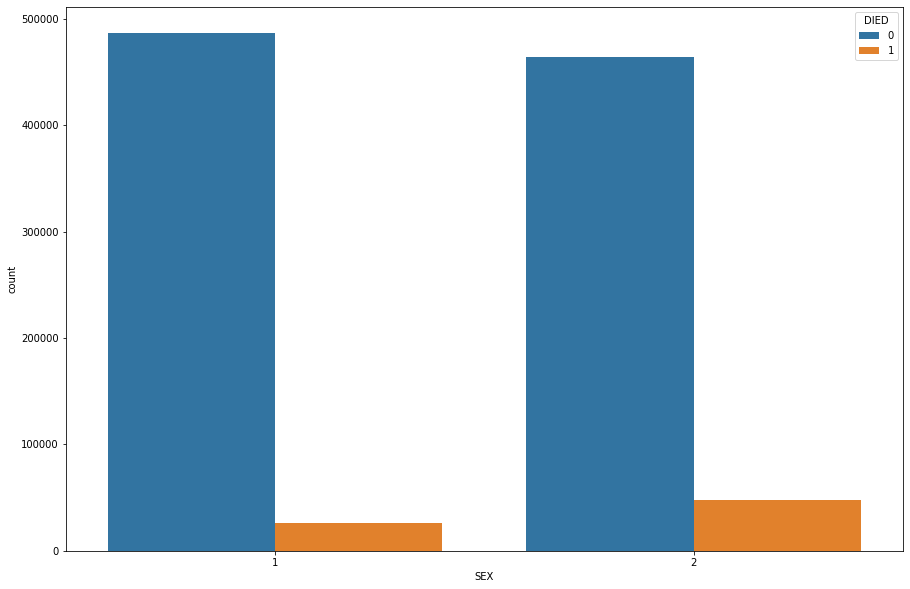

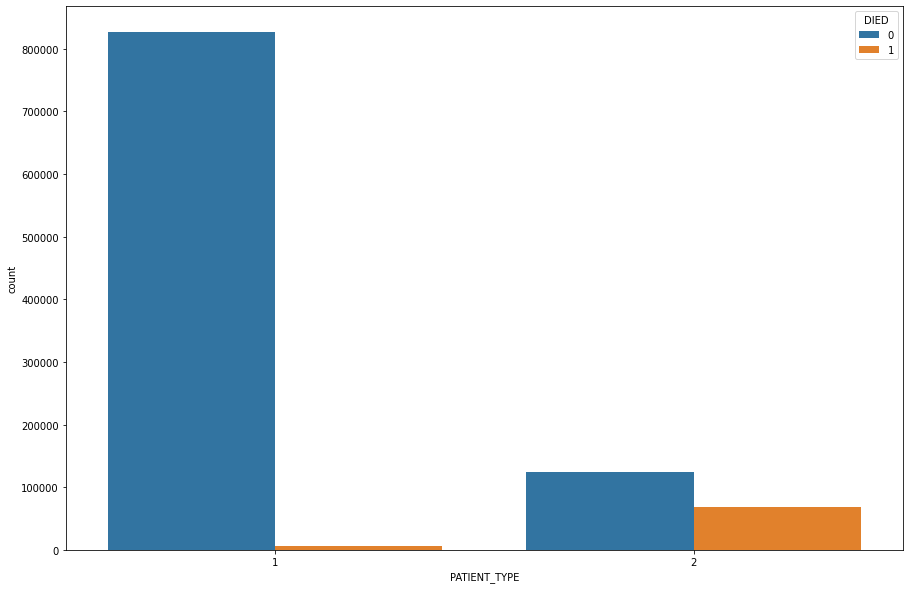

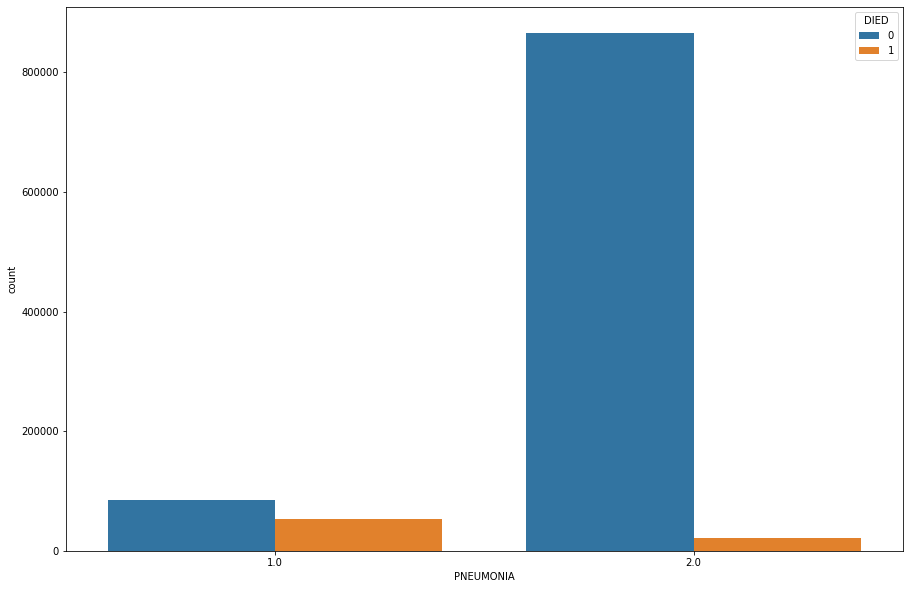

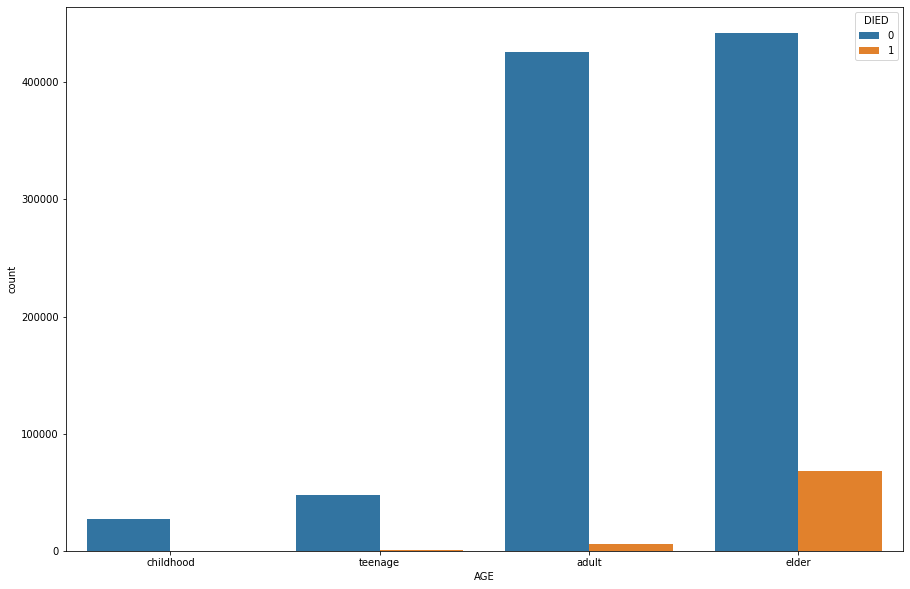

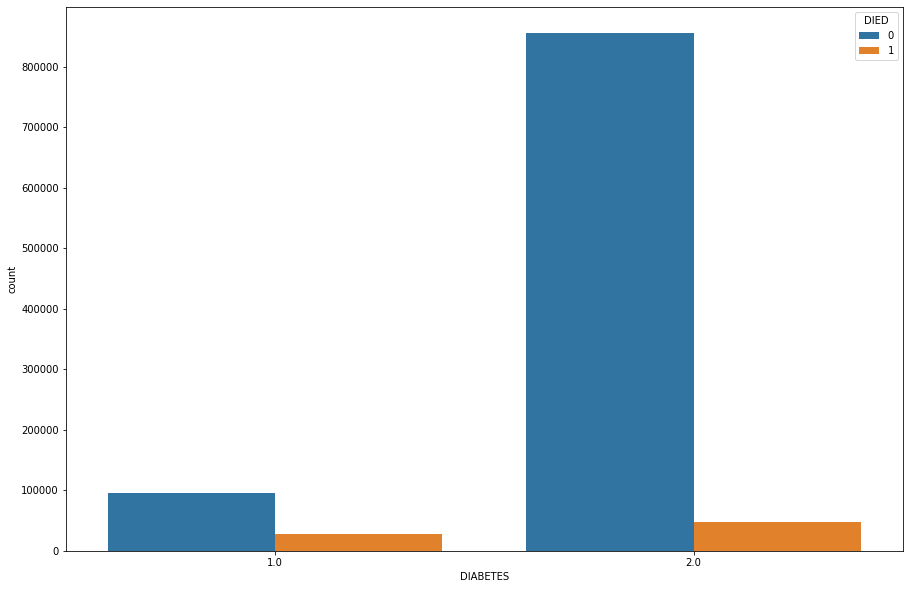

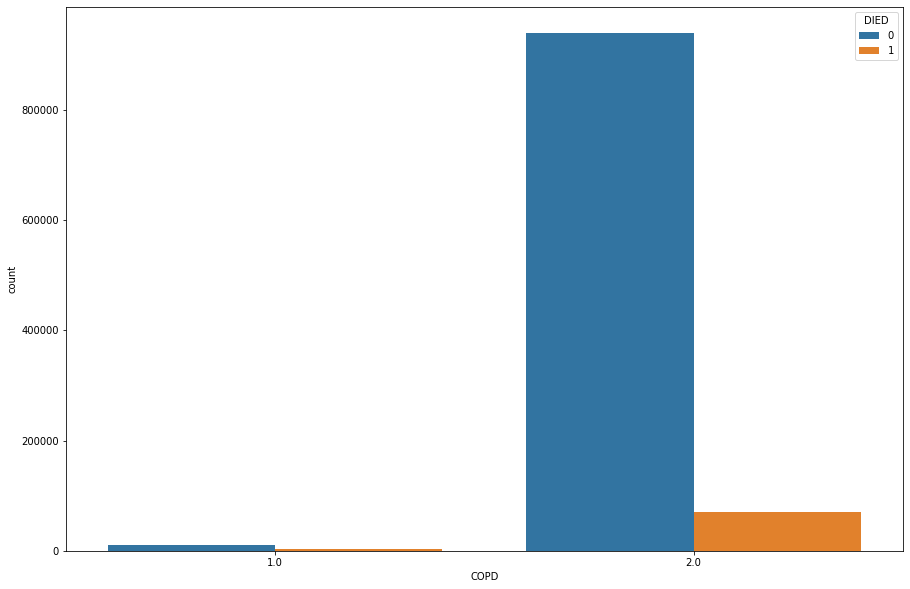

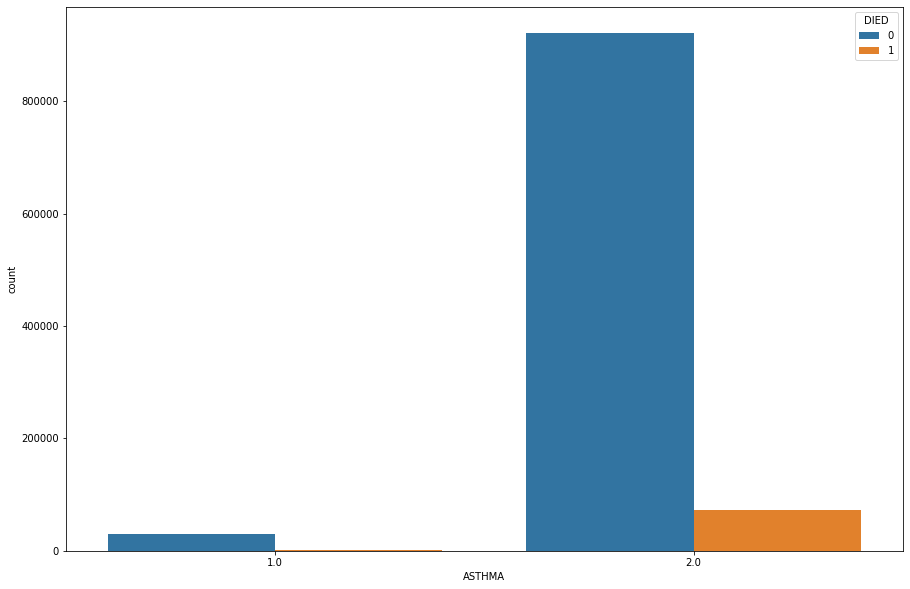

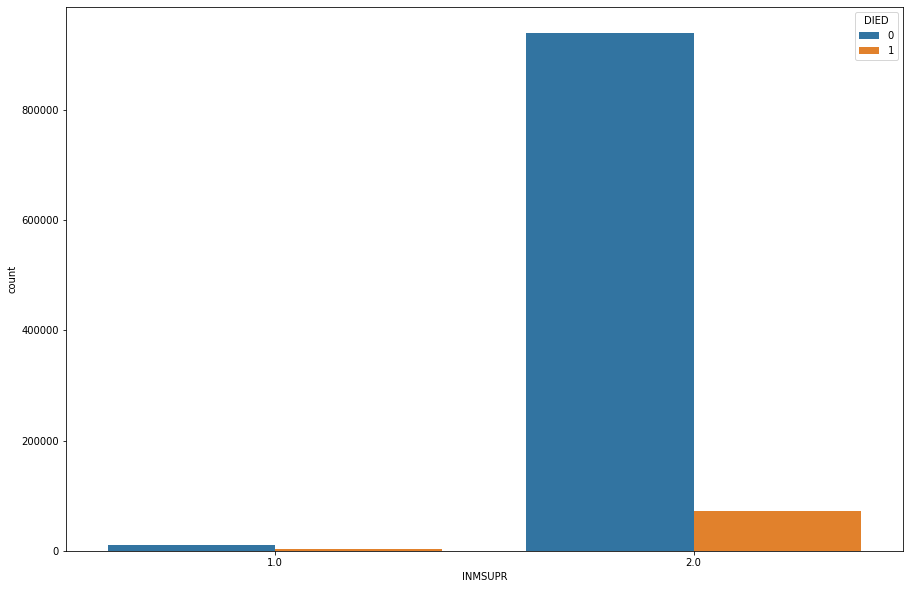

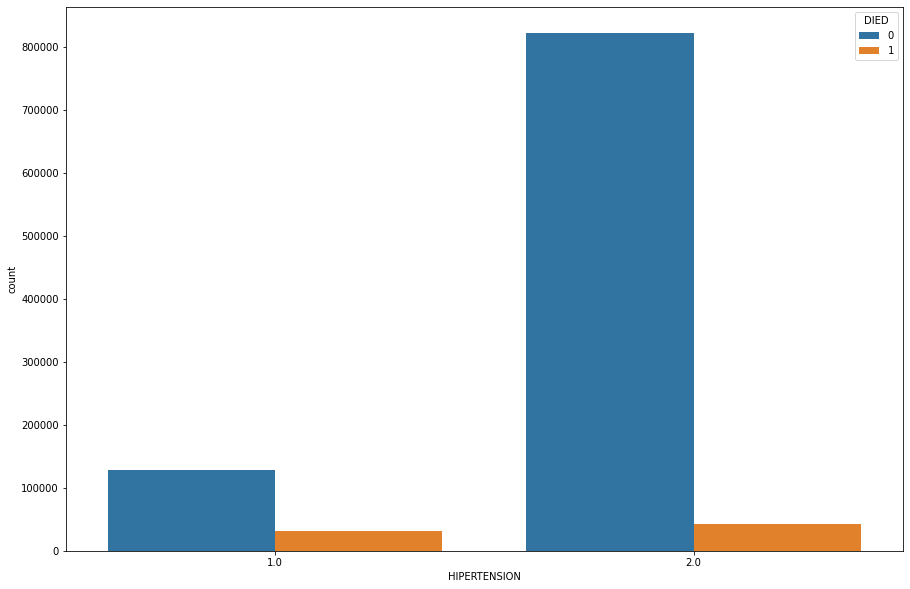

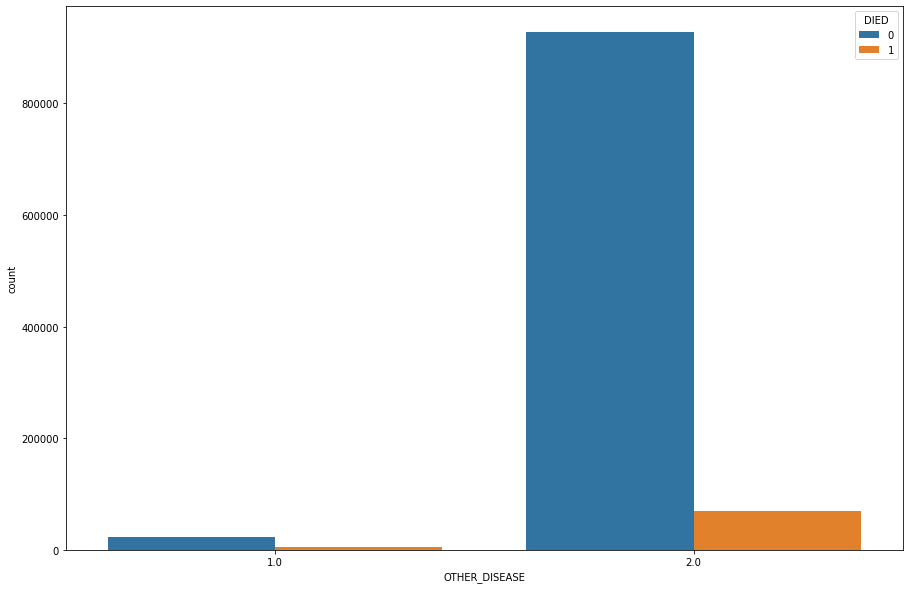

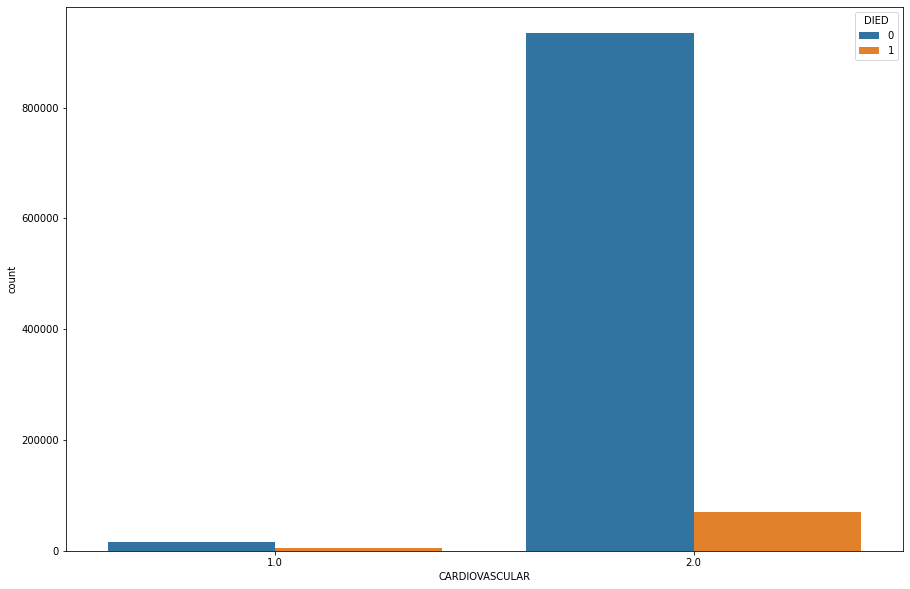

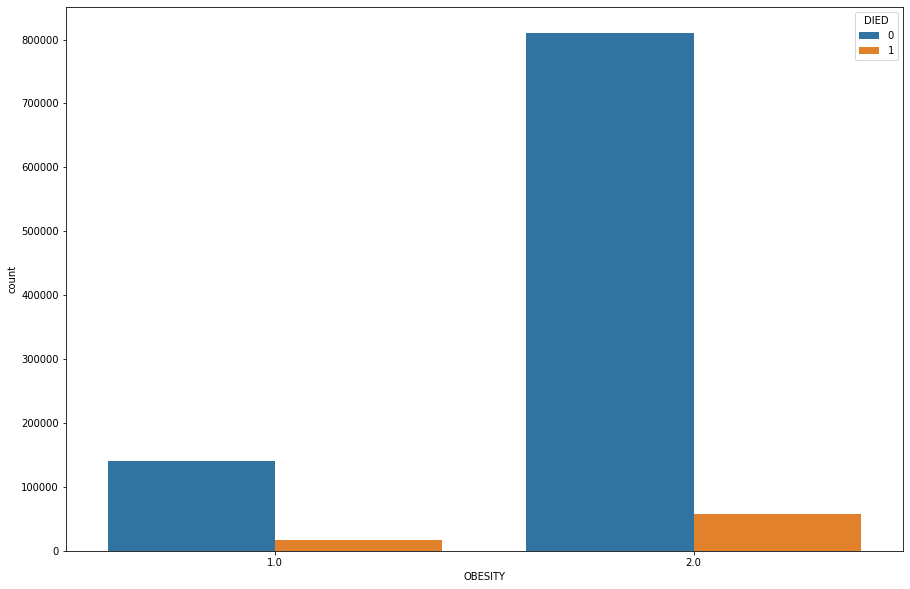

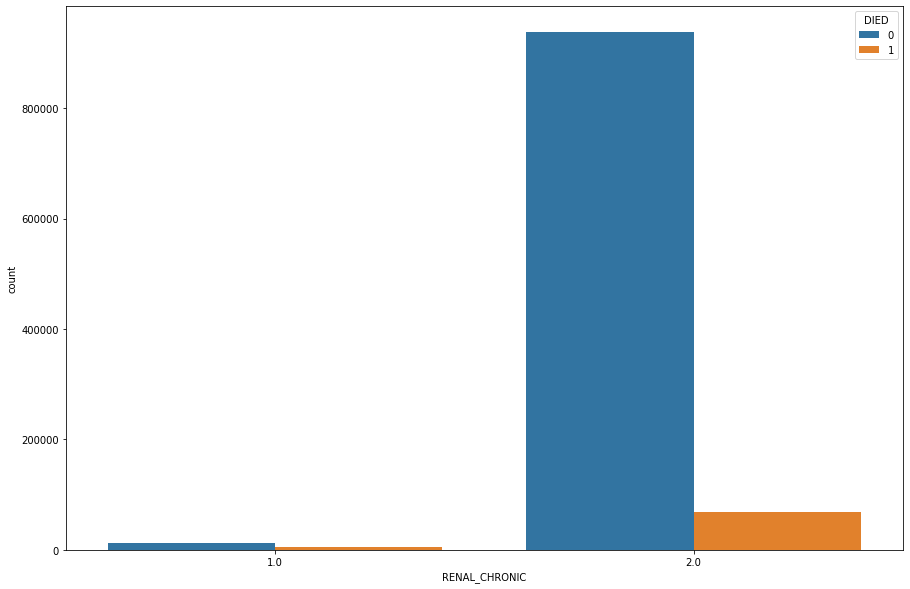

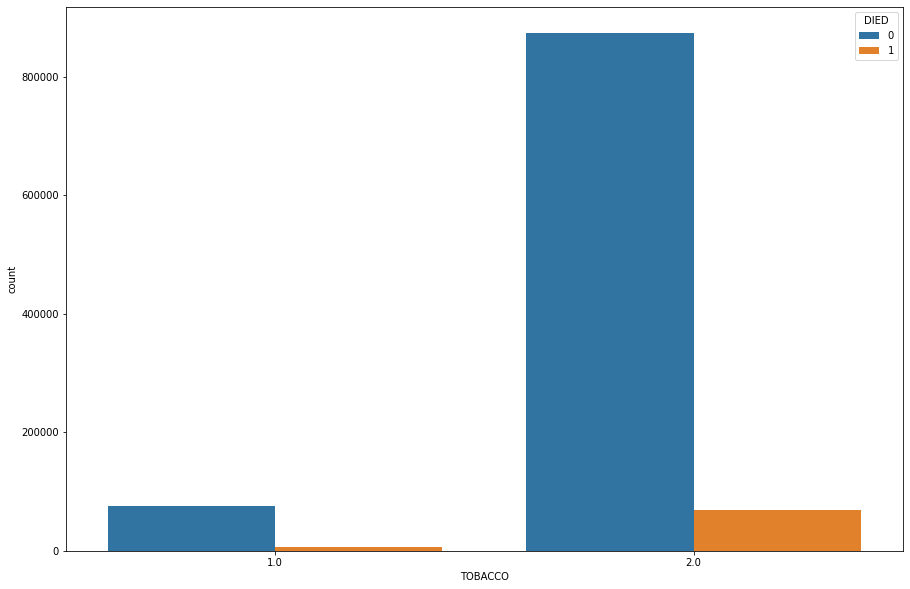

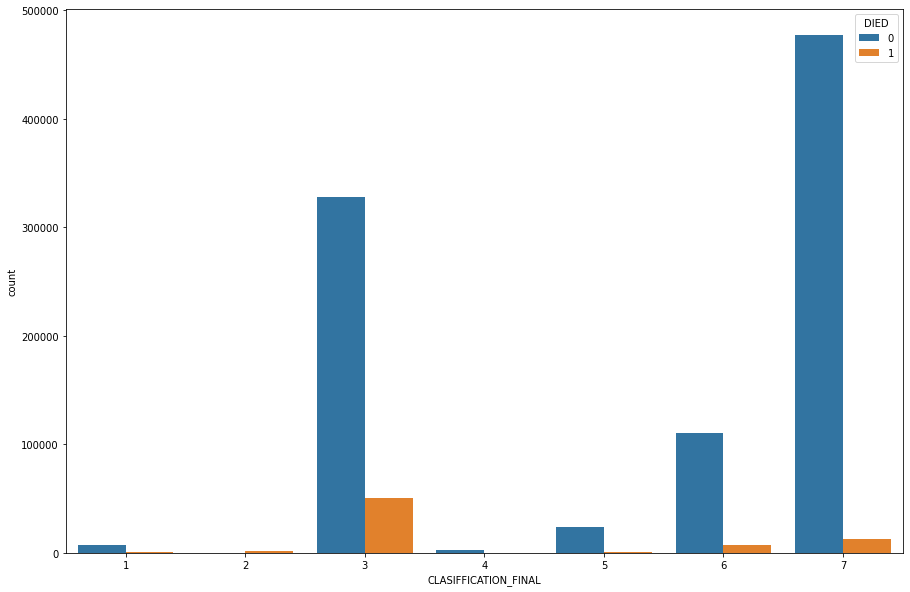

In [65]:
for col in categ_cols:
    plt.figure(figsize=(15,10))
    sns.countplot(x=df[col],hue=df["DIED"])

# **Some Important Insights from plots**
* **Male died more than Female**
* **Death more in patient type- Hospitalization**
* **Death cases more in Age between 40-100.**

**Converting categorical data to numerical**

In [66]:
df=pd.get_dummies(data=df,columns=["AGE"])

* **X=Independent feature**
* **y=Dependent feature**

In [67]:
X=df.drop(["DIED"],axis=1)
y=df["DIED"].astype(int)

# **Data Scaling**

In [68]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# **Logistic Regression**

In [70]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [71]:
acc_lr=metrics.accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression model is:",acc_lr)

Accuracy of Logistic Regression model is: 0.9350819160250968


# **Random Forest Classifier**

In [72]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [73]:
acc_rf=metrics.accuracy_score(y_test,y_pred_rf)
print("Accuracy of Random Forest model is:",acc_rf)

Accuracy of Random Forest model is: 0.9365585837000608


# **Gradient Boosting Classifier**

In [74]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)

In [75]:
acc_gb=metrics.accuracy_score(y_test,y_pred_gb)
print("Accuracy of Gradient Boosting model is:",acc_gb)

Accuracy of Gradient Boosting model is: 0.9387280492049088


# **Decision Tree Classifier**

In [76]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [77]:
acc_dt=metrics.accuracy_score(y_test,y_pred_dt)
print("Accuracy of Decision Tree model is:",acc_dt)

Accuracy of Decision Tree model is: 0.9361552647756213


# **Comparison of Various Models**

# Results

In [78]:
pd.DataFrame({"Model":["Logistic Regression","Random Forest Classifier","Gradient Boosting Classifier","Decision Tree Classifier"],
             "Accuracy":[acc_lr,acc_rf,acc_gb,acc_dt]})

,Model,Accuracy
0,Logistic Regression,0.935082
1,Random Forest Classifier,0.936559
2,Gradient Boosting Classifier,0.938728
3,Decision Tree Classifier,0.936155
